In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import os
import warnings

sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)
os.chdir('D:\Data analysis\Python\Python_sublessons\Kaggle_competition\Loan Sanction')
warnings.filterwarnings(action='ignore')

In [5]:
df = pd.read_csv('./train.csv')

df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,NaN,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


### Data preprocessing Part 1

In [7]:
# Removing identifier columns

df.drop(['Customer ID', 'Name'], axis = 1,inplace=True)

df.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,NaN,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [9]:
## Check the number of unique values in all of the object data types

df.select_dtypes(include = object).nunique()

Gender                     2
Income Stability           2
Profession                 8
Type of Employment        18
Location                   3
Expense Type 1             2
Expense Type 2             2
Has Active Credit Card     3
Property Location          3
dtype: int64

### Segment Type of Employment into smaller unique values

In [10]:
df['Type of Employment'].unique()

array(['Sales staff', nan, 'High skill tech staff', 'Secretaries',
       'Laborers', 'Managers', 'Cooking staff', 'Core staff', 'Drivers',
       'Realty agents', 'Security staff', 'Accountants',
       'Private service staff', 'Waiters/barmen staff', 'Medicine staff',
       'Cleaning staff', 'Low-skill Laborers', 'HR staff', 'IT staff'],
      dtype=object)

In [15]:
# Create a function to segment values

def segment_employment_type(value):
    if pd.isna(value):
        return 'Unknown'
    elif 'Sales' in value or 'Realty' in value:
        return 'Sales/Realty'
    elif 'Tech' in value or 'IT' in value:
        return 'Tech/IT'
    elif 'Secretaries' in value or 'HR' in value:
        return 'Secretaries/HR'
    elif 'Laborers' in value or 'Low-skill Laborers' in value:
        return 'Laborers'
    elif 'Cooking' in value or 'Waiters' in value:
        return 'Hospitality'
    elif 'Managers' in value:
        return 'Managers'
    else:
        return 'Other'
    
## Applying this function to reduce the number of segments
df['Type of Employment'] = df['Type of Employment'].apply(segment_employment_type)

<Axes: >

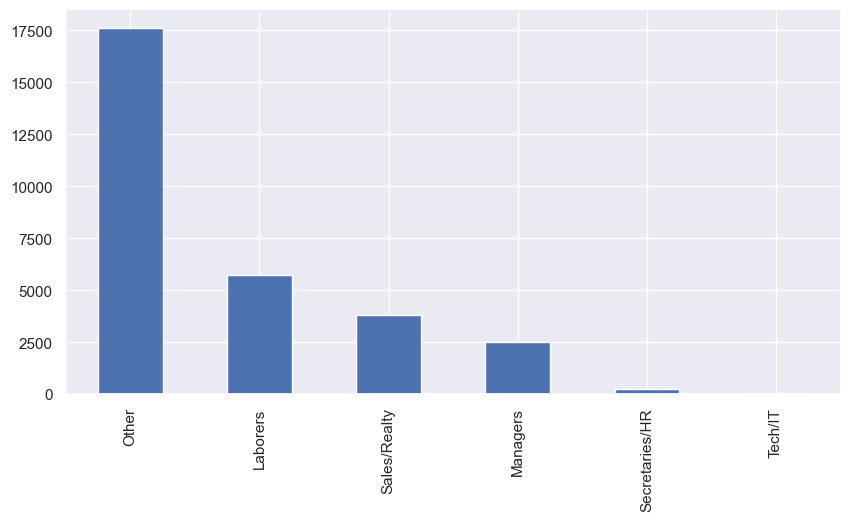

In [20]:
plt.figure(figsize = (10,5))

df['Type of Employment'].value_counts().plot(kind = 'bar')

## Exploratory Data Analysis

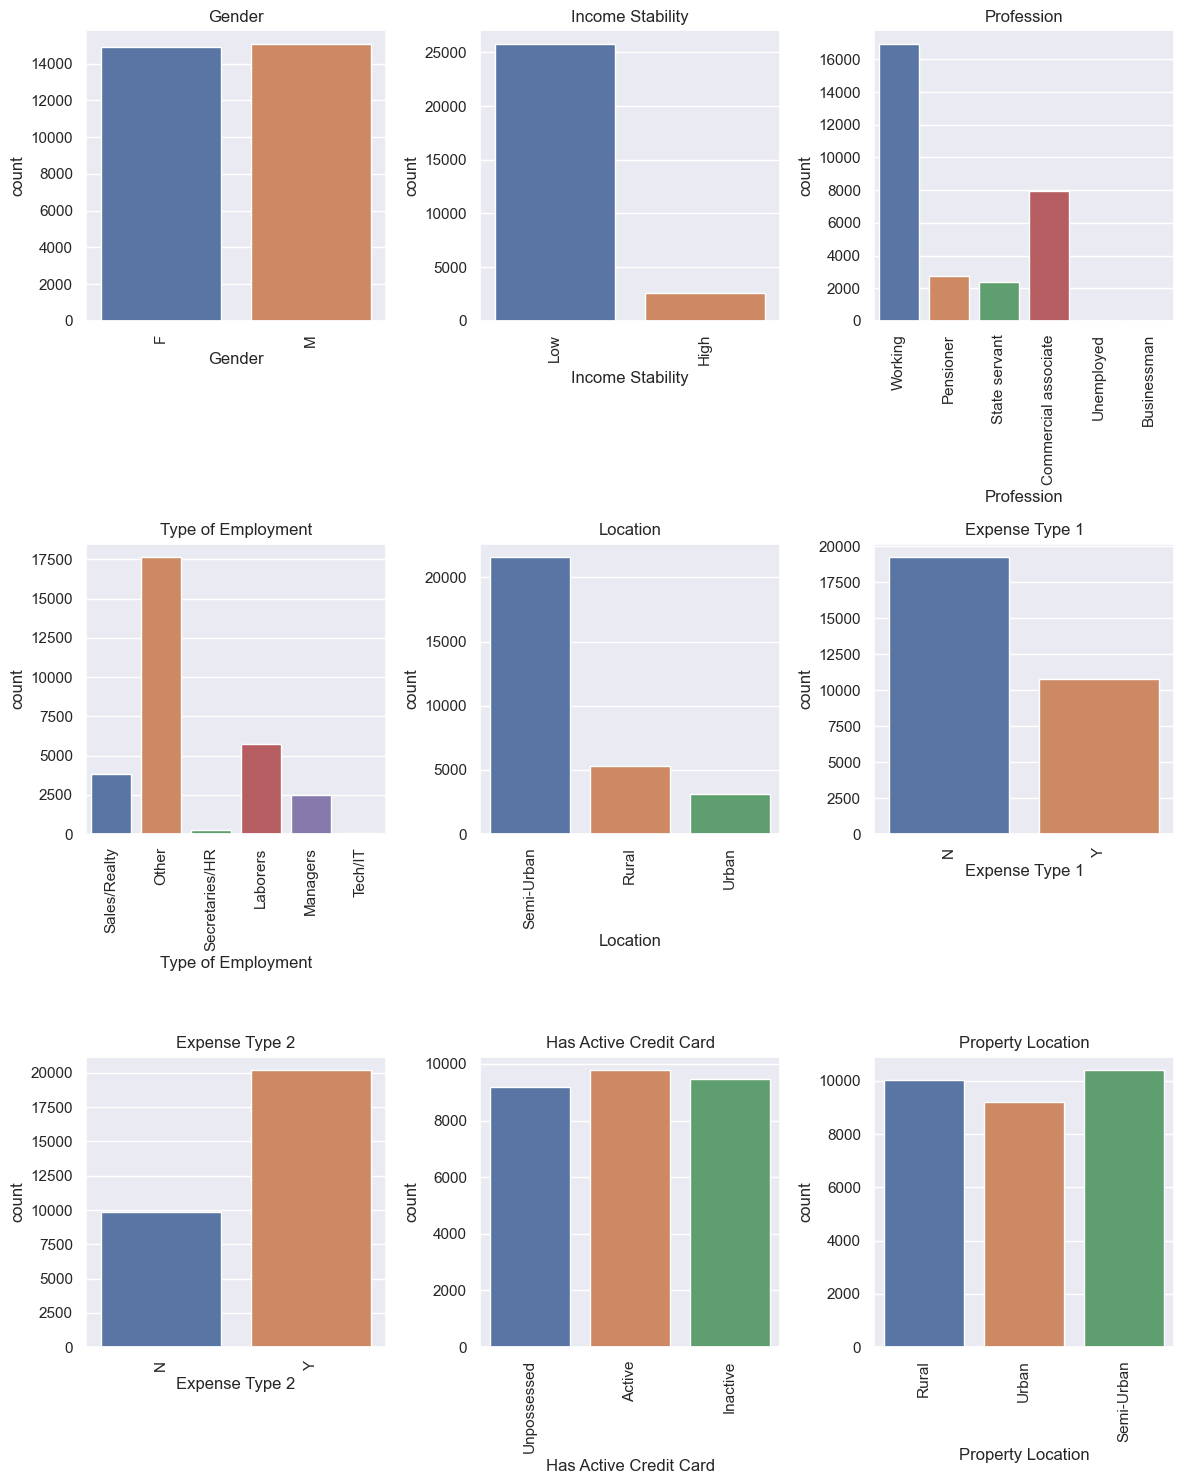

In [40]:
## Get the names of all columns with 'object' data type (categorical columns)

cat_vars = df.select_dtypes(include='object').columns.tolist()

# Create a figure with subplots

num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3

fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize = (12,num_rows*5))
axs = axs.flatten()

## Then we will create a catplot for the top 6 values of each categorical variable with Seaborn

for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().nlargest(6).index
    filtered_df = df[df[var].isin(top_values)]
    
    sns.countplot(x=var, data = filtered_df, ax = axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis = 'x', rotation = 90)
    
# Remove any extra subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig, delaxes(axs[i])
        
# Adjust spacings between subplots

fig.tight_layout()

plt.show()

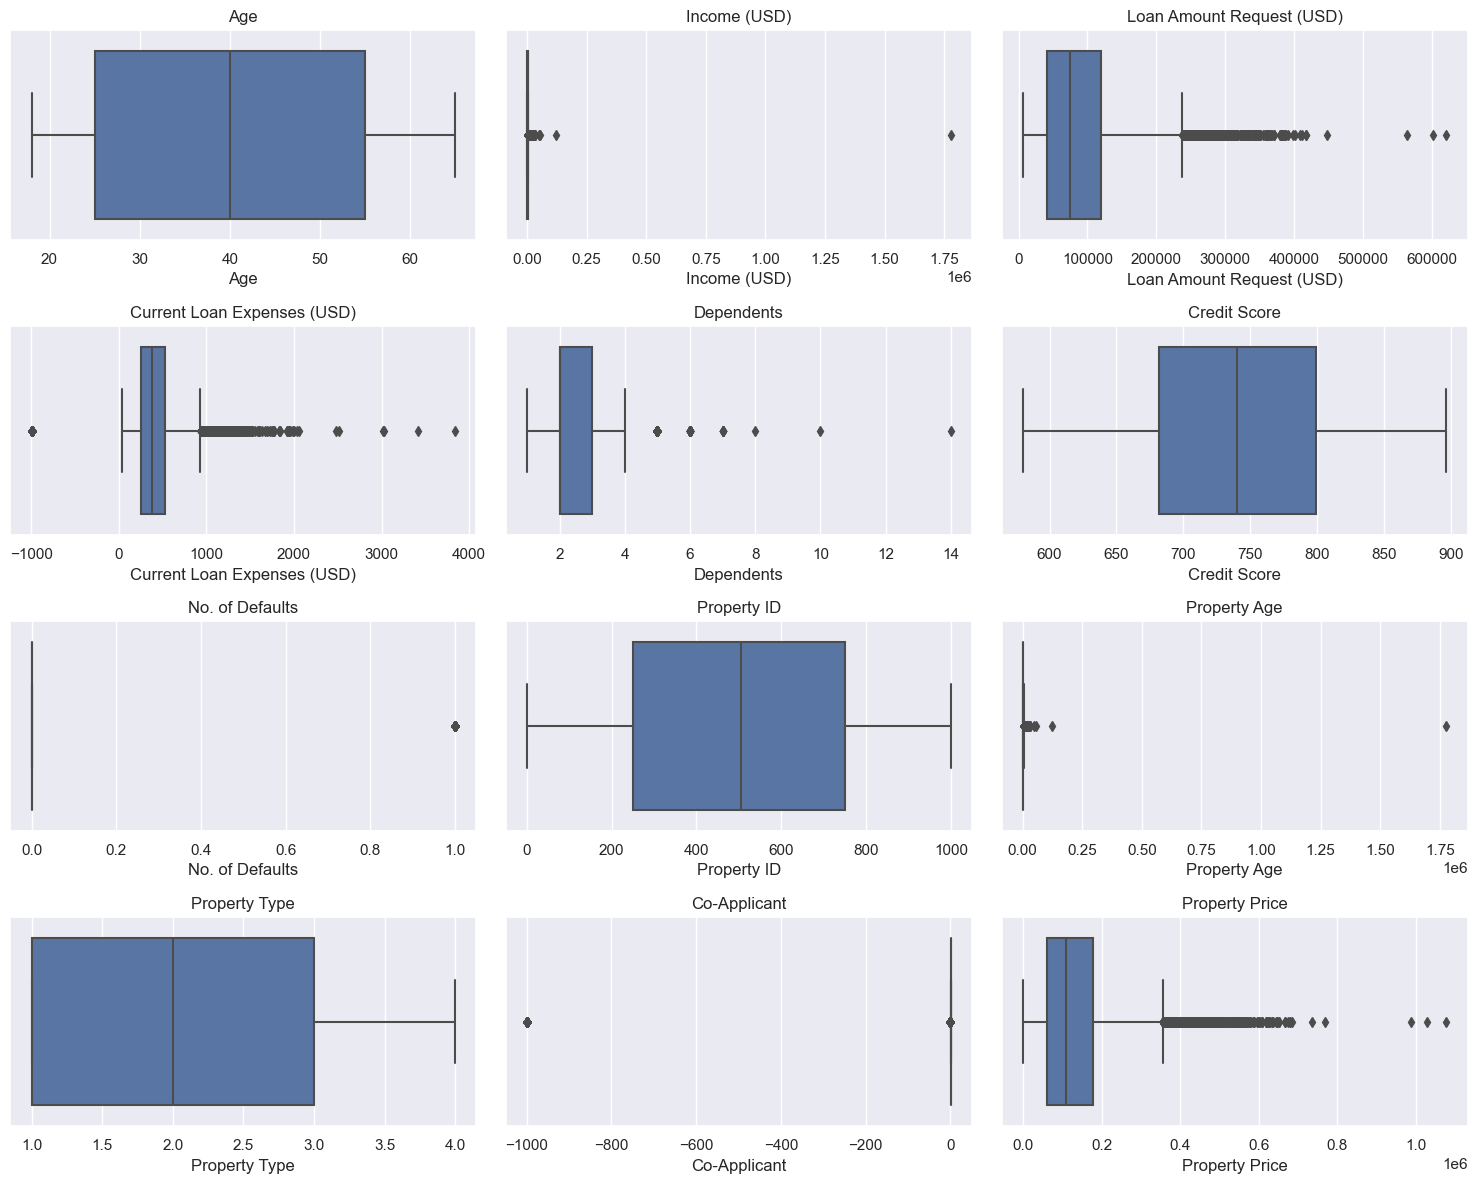

In [51]:
## Get the names of all columns with data type 'int' or 'float' except 'cltv'

num_vars = df.select_dtypes(include = ['int', 'float']).columns.tolist()

excluded_vars = ['Loan Sanction Amount (USD)']

num_vars = [var for var in num_vars if var not in excluded_vars]

# Create figure with subplots

num_cols = len(num_vars)
num_rows = (num_cols + 2) //3

fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize = (15, 3*num_rows))

axs = axs.flatten()

# Create a boxplot for each numerical variable using seaborn

for i, var in enumerate(num_vars):
    sns.boxplot(x = df[var], ax = axs[i])
    axs[i].set_title(var)
    
# Remove any extra subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

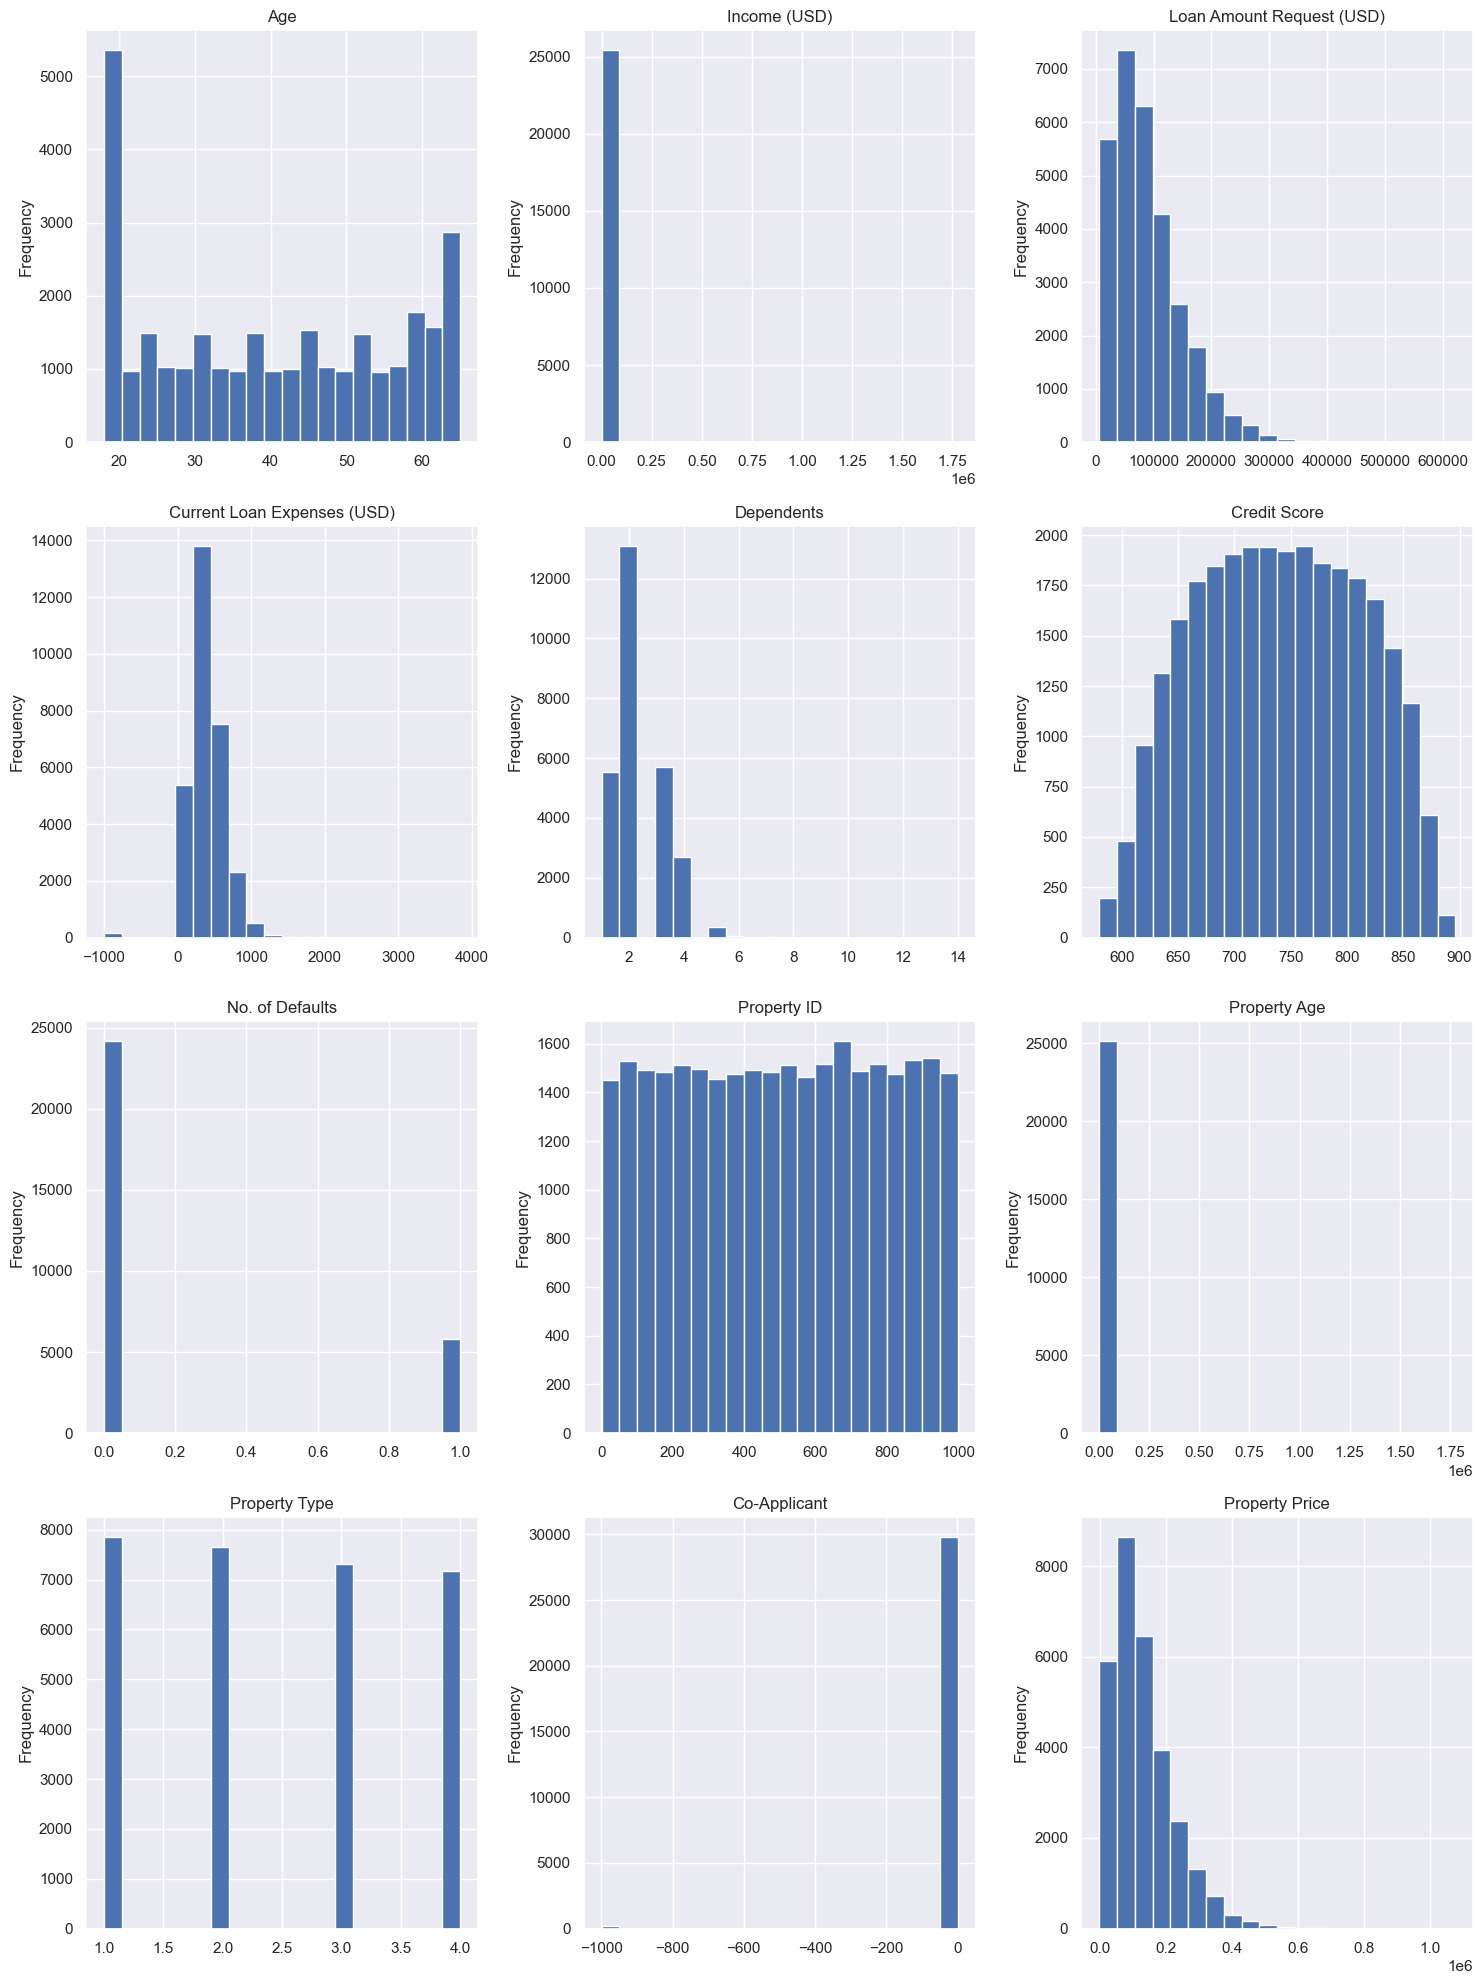

In [61]:
# Get the names of all columns with data type 'int' or float except 'cltv'

num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()
excluded_vars = ['Loan Sanction Amount (USD)']

num_vars = [var for var in num_vars if var not in excluded_vars]

# Create a figure of subplots

num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3 # to make sure there are enough rows for subplots
fig,axs = plt.subplots(nrows=num_rows, ncols=3, figsize = (15,num_rows*5))
axs = axs.flatten()

# Create a histogram for each num variable
for i, var in enumerate(num_vars):
    df[var].plot.hist(ax = axs[i], bins = 20)
    axs[i].set_title(var)
    
# To remove any unneccessary subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])
        
fig.tight_layout()

plt.show()

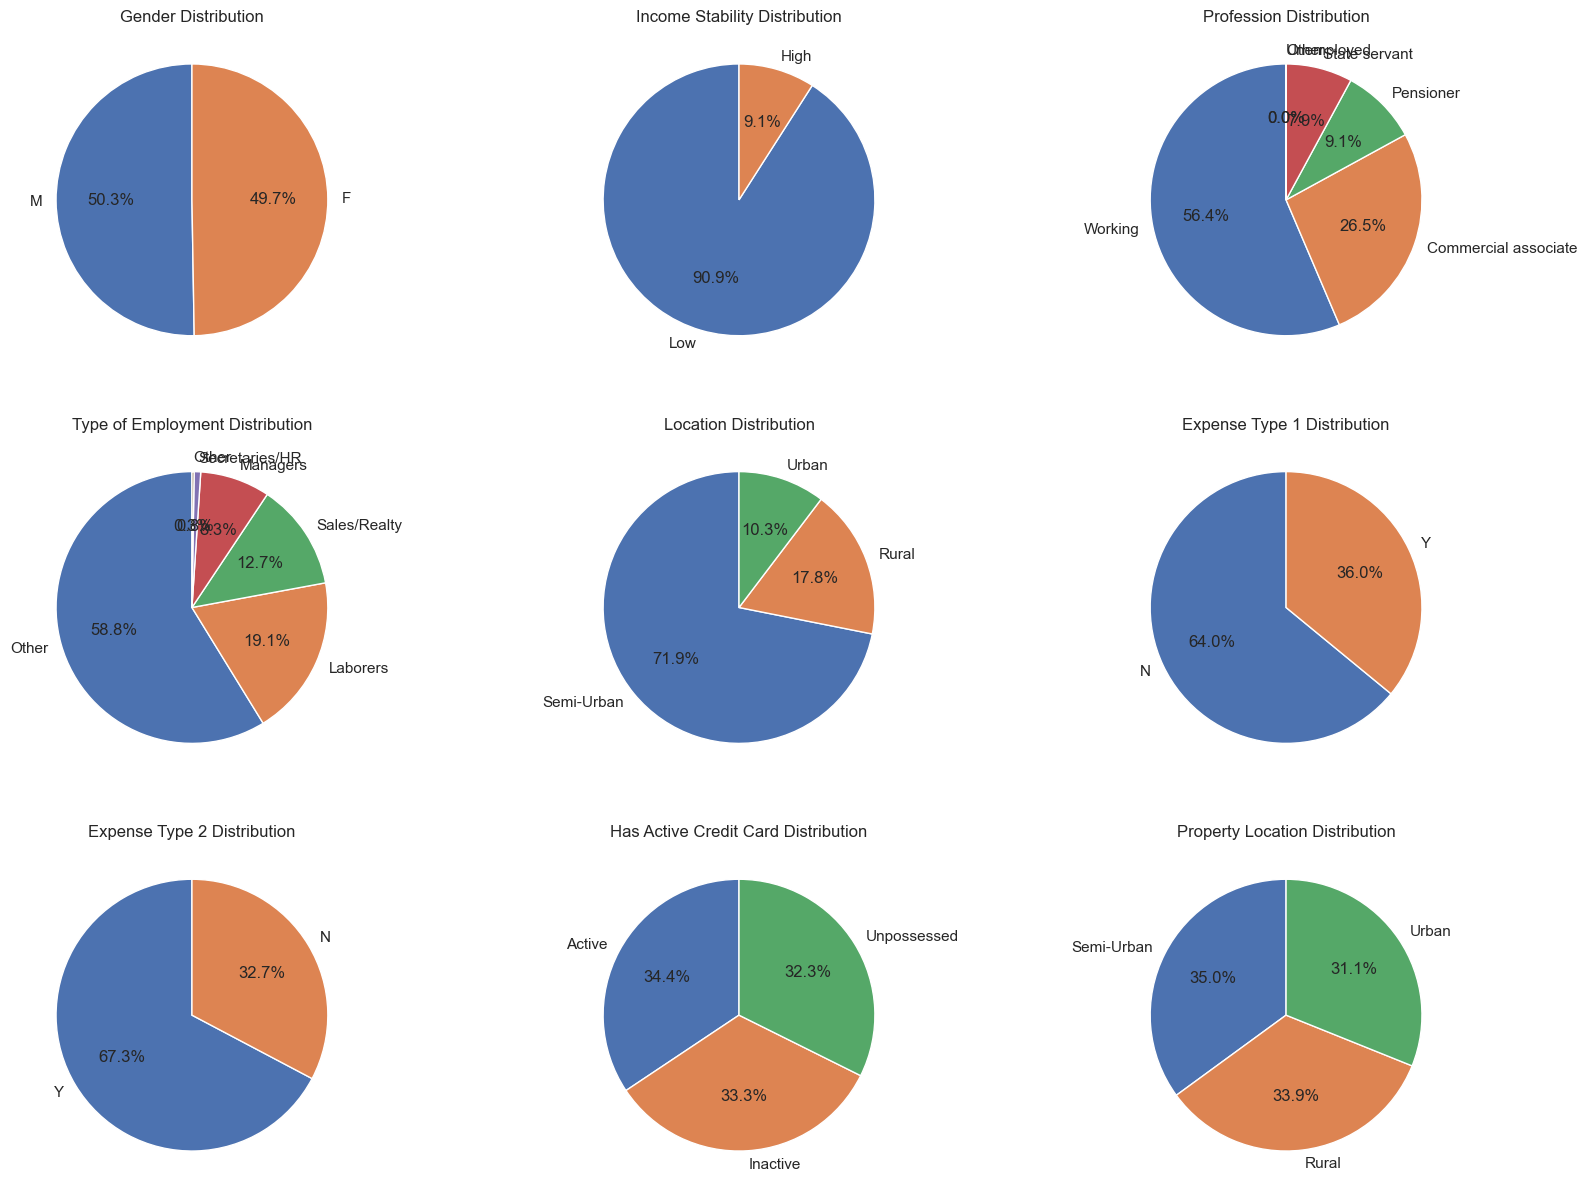

In [77]:
# Specify the max number of categories to show individually

max_categories = 5

# Filter categorical columns with 'object' data type

cat_cols = [col for col in df.columns if col !='y' and df[col].dtype == 'object']

# Create a figure with subplots

num_cols = len(cat_cols)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize = (20, 5*num_rows))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Create a pie chart for each categorical column

for i, var in enumerate(cat_cols):
    if i < len(axs): # ensure we don't exceed the number subplots
        # Count the number of occurences for each category
        cat_counts = df[var].value_counts()
        
        ## Grop cat categories beyond the top max categories as 'Other':
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_counts_other = pd.Series(cat_counts[max_categories:].sum(), index=['Other'])
            cat_counts = cat_counts_top.append(cat_counts_other)
        #Create a pie chart
        
        axs[i].pie(cat_counts, labels = cat_counts.index, autopct = '%1.1f%%', startangle = 90)
        axs[i].set_title(f'{var} Distribution')
        
# Remove any extra subplots if needed

if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])
        
        
# fig.tight_layout()

plt.show()

# Data preprocessing Pt2

In [91]:
## Check the amount of missing values
# First index of df shape is the total number of rows

check_missing = df.isnull().sum()*100/df.shape[0]

check_missing[check_missing > 0].sort_values(ascending=False)

Property Age                   16.166667
Income (USD)                   15.253333
Dependents                      8.310000
Credit Score                    5.676667
Income Stability                5.610000
Has Active Credit Card          5.220000
Property Location               1.186667
Loan Sanction Amount (USD)      1.133333
Current Loan Expenses (USD)     0.573333
Gender                          0.176667
dtype: float64

In [95]:
# Fill null values with the average values because of the outliers

df['Property Age'].fillna(df['Property Age'].median(), inplace=True)

df['Income (USD)'].fillna(df['Income (USD)'].median(), inplace=True)

df['Dependents'].fillna(df['Dependents'].median(), inplace=True)

df['Credit Score'].fillna(df['Credit Score'].median(), inplace=True)

df['Loan Sanction Amount (USD)'].fillna(df['Loan Sanction Amount (USD)'].median(), inplace=True)

df['Current Loan Expenses (USD)'].fillna(df['Current Loan Expenses (USD)'].median(), inplace=True)

In [98]:
# Remove null values in other columns

df.dropna(subset = ['Income Stability', 'Has Active Credit Card', 'Property Location', 'Gender'],inplace=True)

In [99]:
df.shape

(26474, 22)

# Label Encoding for object Data types

In [110]:
# Loop over each column in DataFrame where datatype is object

for col in df.select_dtypes(include='object').columns:
    # Print the column name and unique values
    print(f'{col}: {df[col].unique()}')

In [103]:
from sklearn.preprocessing import LabelEncoder

In [109]:
# Loop over each column in DataFrame where datatype is object

for col in df.select_dtypes(include='object').columns:
    # Initialize LabelEncoder object
    encoder = LabelEncoder()
    # # Fit the encoder to the unique values in a column
    encoder.fit(df[col].unique())
    # Transform the column using encoder
    df[col] = encoder.transform(df[col])
    # Print the column name and unique encoded values
    print(f'{col}: {df[col].unique()}')

<Axes: >

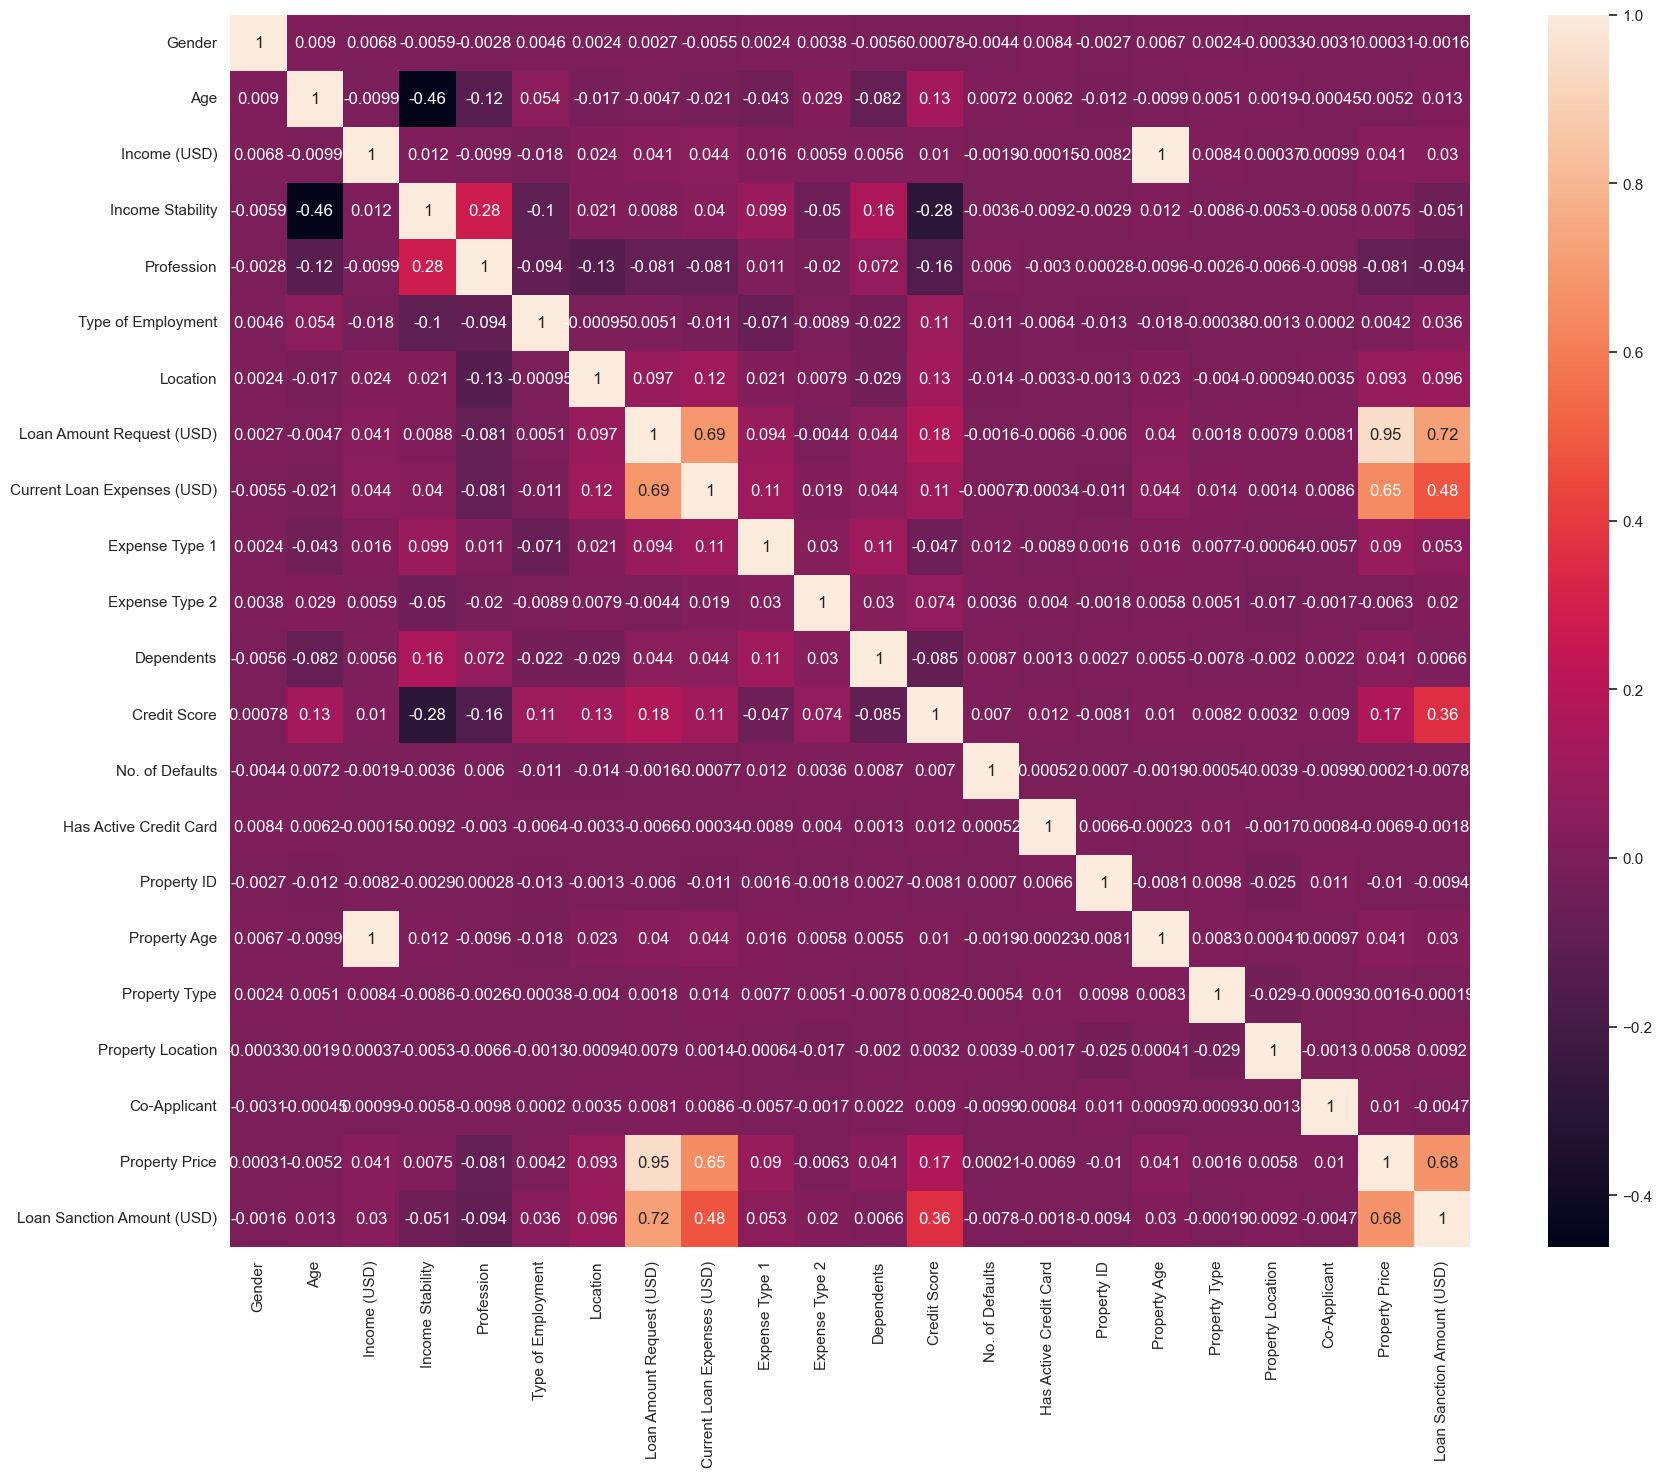

In [115]:
# Correlation Heatmap
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(), annot=True)

# Train test split

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [118]:
X = df.drop(['Loan Sanction Amount (USD)'], axis = 1)
y = df['Loan Sanction Amount (USD)']

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Remove outliers from the train set using Z-score

In [141]:
from scipy import stats

In [142]:
# Define the columns for which we want to remove outliers

selected_columns = ['Income (USD)', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)', 
                   'Dependents', 'Property Age', 'Co-Applicant', 'Property Price']

# Calculate the z-scores for the selected columns in the training data

z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Set the threshold value for outlier detection(e.g. 3)

thres = 3

# # Find the indices of outliers based on the threshold

outlier_indices = np.where(z_scores > thres)[0]

# Remove the outliers from the training data

X_train = X_train.drop(X_train.index[outlier_indices])

y_train = y_train.drop(y_train.index[outlier_indices])

# Decision Tree Regressor

In [143]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [144]:
# Create Decision Tree object
d_tree = DecisionTreeRegressor()

# Define the hyperparameters to tune the values
param_grid = {'max_depth': [2,4,6,8],
             'min_samples_split':[2,4,6,8],
             'min_samples_leaf':[1,2,3,4],
             'max_features':['auto', 'sqrt', 'log2'],
             'random_state':[0,42,101]}

# Create a GridSearchCV object
grid_cv = GridSearchCV(estimator=d_tree, param_grid=param_grid, cv = 5, scoring='neg_mean_squared_error')

# Fit the training data to the GridSearchCV
grid_cv.fit(X_train, y_train)

# Print the best Hyperparameters

print(grid_cv.best_params_)

{'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 42}


In [147]:
d_tree = DecisionTreeRegressor(max_depth= 6, max_features= 'auto', min_samples_leaf= 4, min_samples_split =2, random_state= 42)

d_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, max_features='auto', min_samples_leaf=4,
                      random_state=42)

In [149]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math

y_pred = d_tree.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is: {}'.format(mae))
print('MAPE is: {}'.format(mape))
print('MSE is: {}'.format(mse))
print('R2 score is: {}'.format(r2))
print('RMSE is: {}'.format(rmse))

MAE is: 12942.847018592813
MAPE is: 2.2051702137470747e+19
MSE is: 618766011.5657563
R2 score is: 0.7307028437042808
RMSE is: 24875.007770164742


# Feature importance

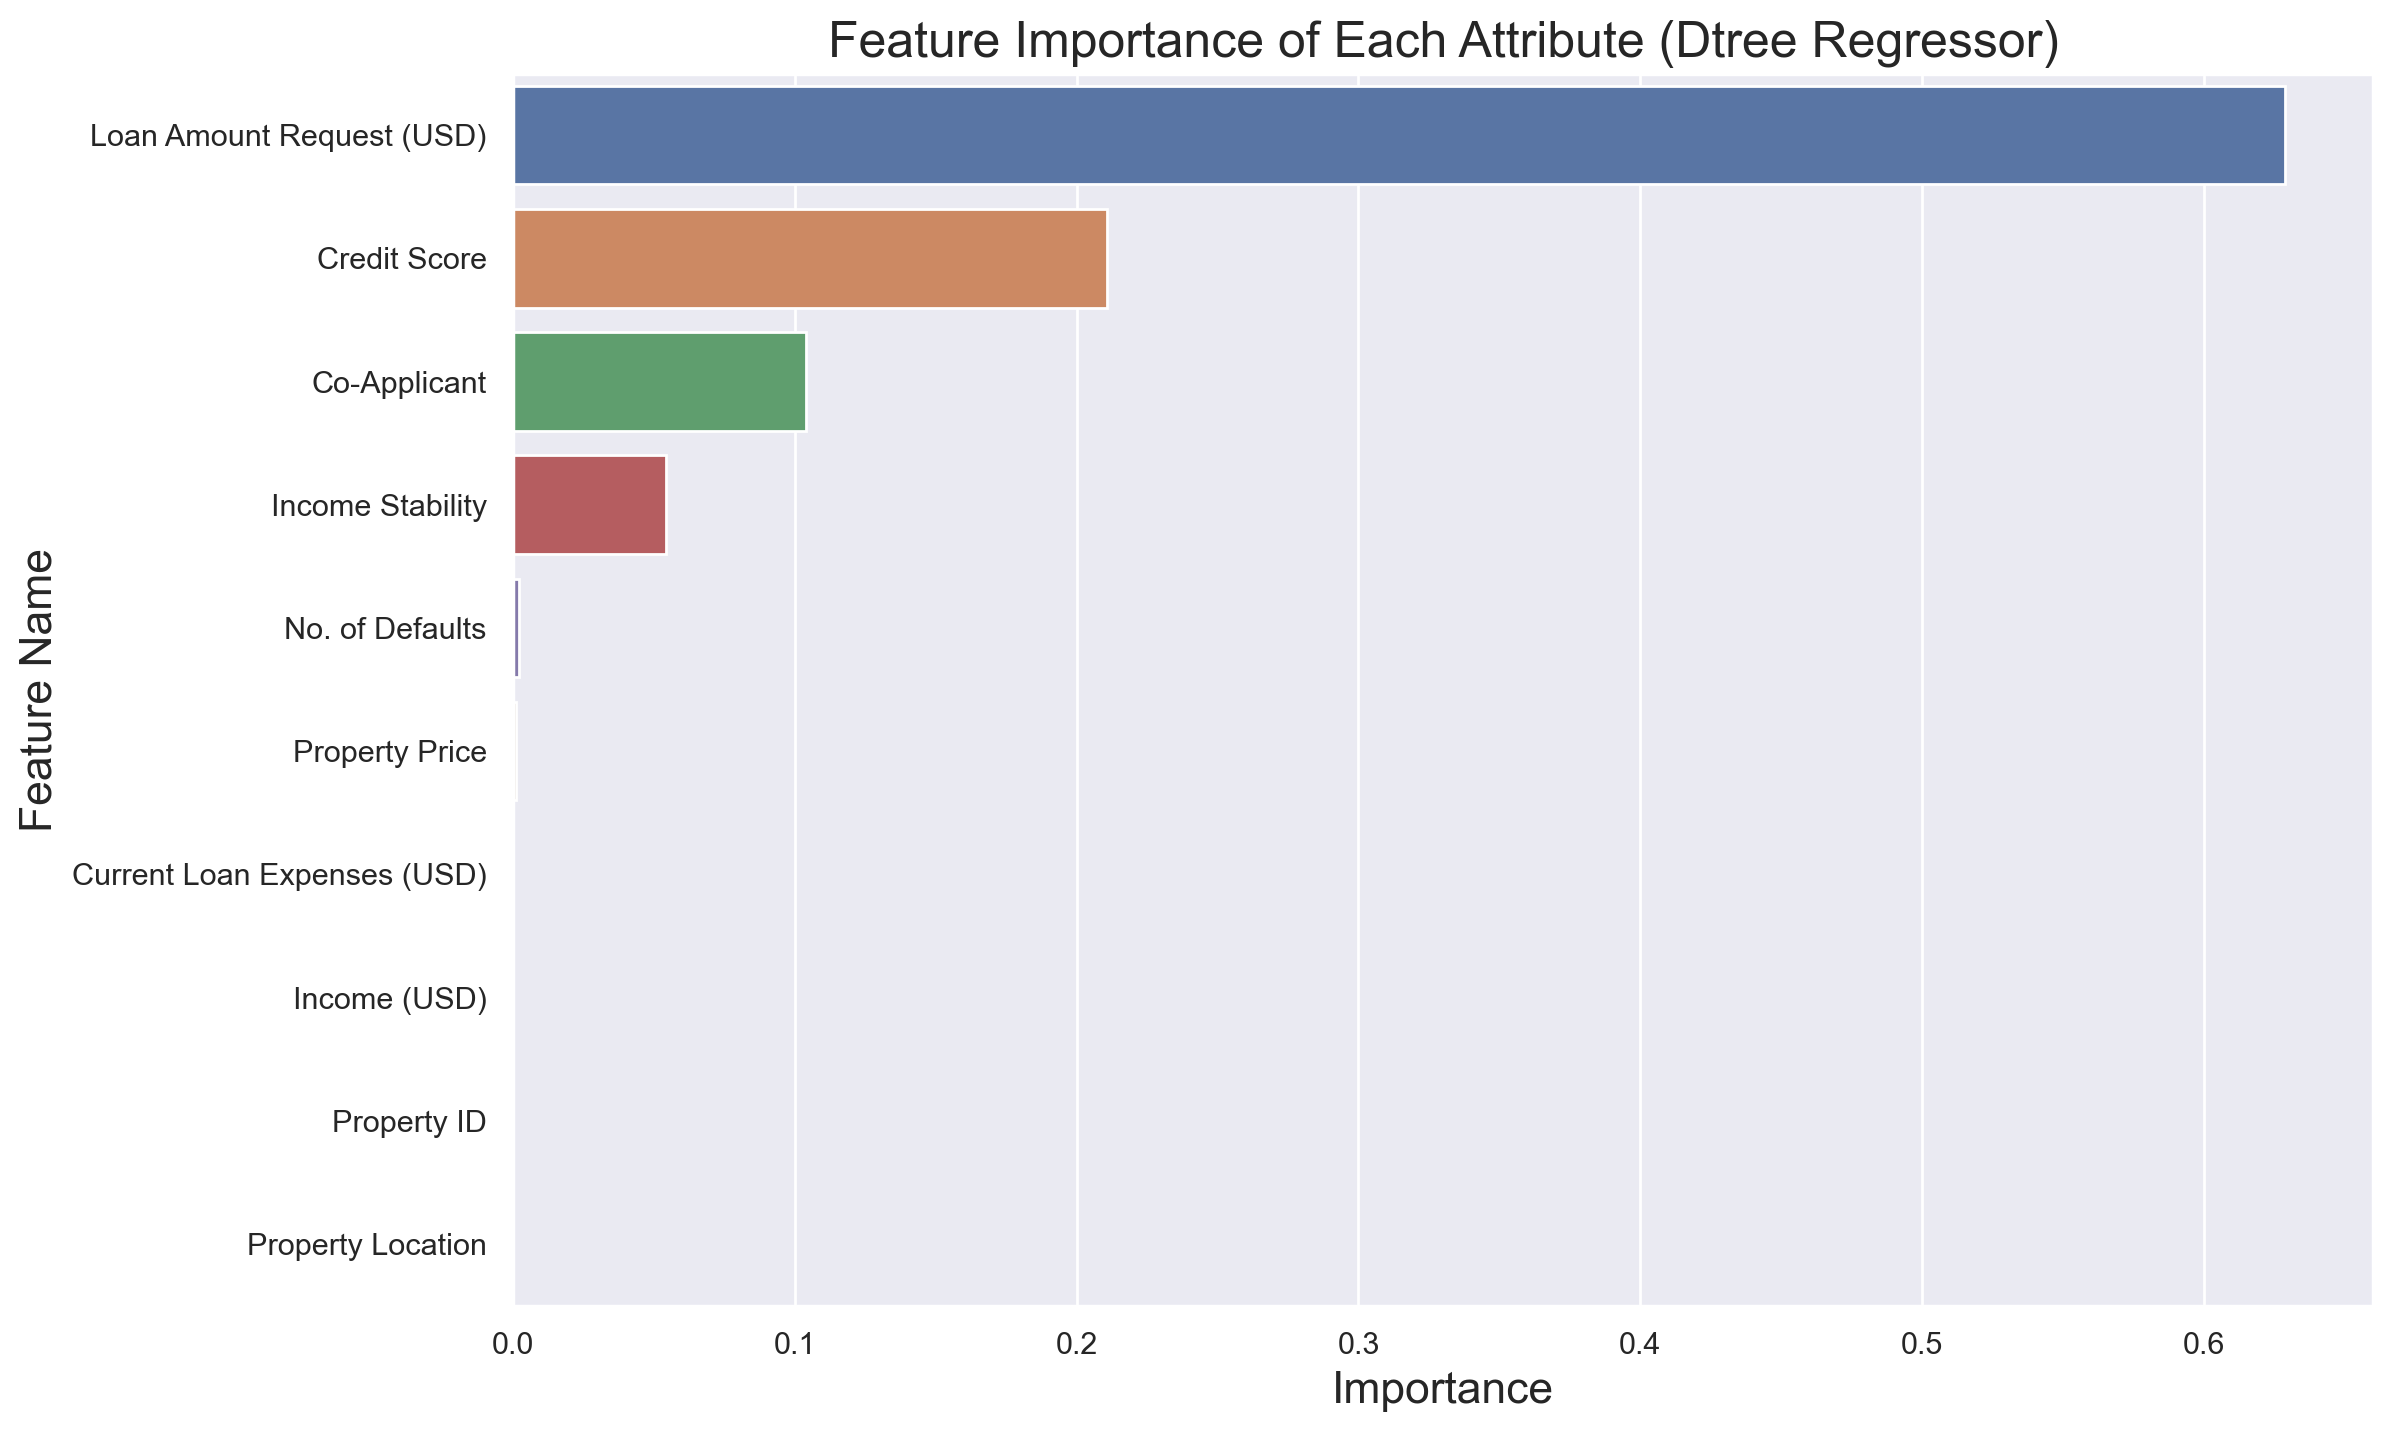

In [153]:
imp_df = pd.DataFrame({'Feature Name':X_train.columns,
                     'Importance':d_tree.feature_importances_})
fi = imp_df.sort_values(by = 'Importance',ascending=False)

fi2 = fi.head(10)
plt.figure(figsize = (12,8), dpi = 200)

sns.barplot(data=fi2, x = 'Importance', y = 'Feature Name')

plt.title('Feature Importance of Each Attribute (Dtree Regressor)', fontsize = 18)

plt.xlabel('Importance', fontsize = 16)
plt.ylabel('Feature Name', fontsize = 16)
plt.show()

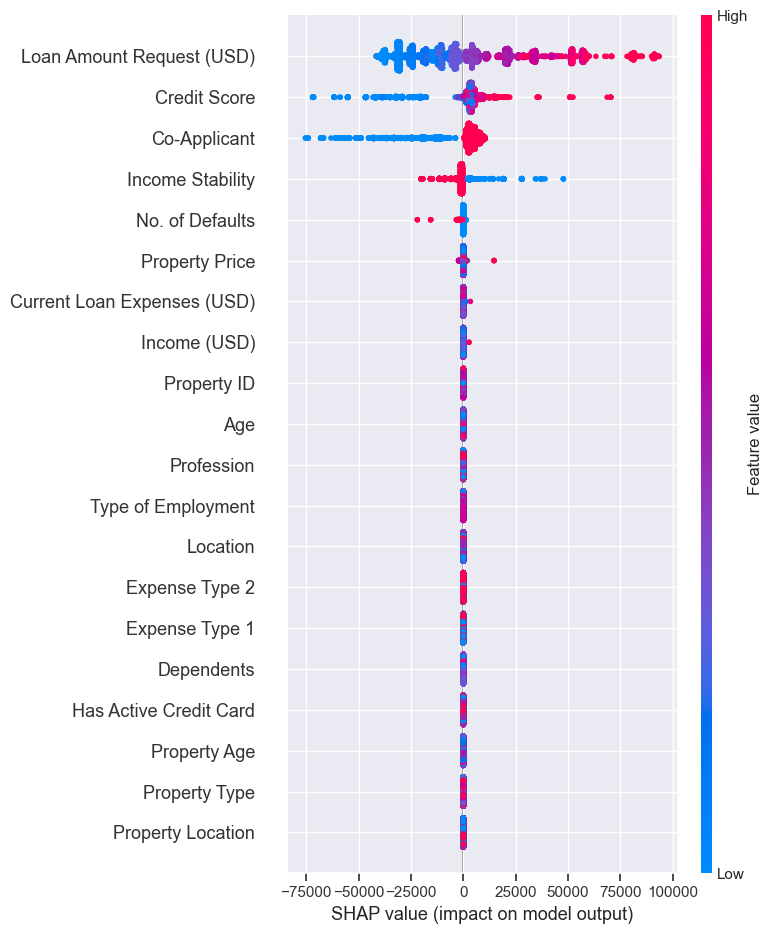

In [158]:
import shap

explainer = shap.TreeExplainer(d_tree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values,X_test)

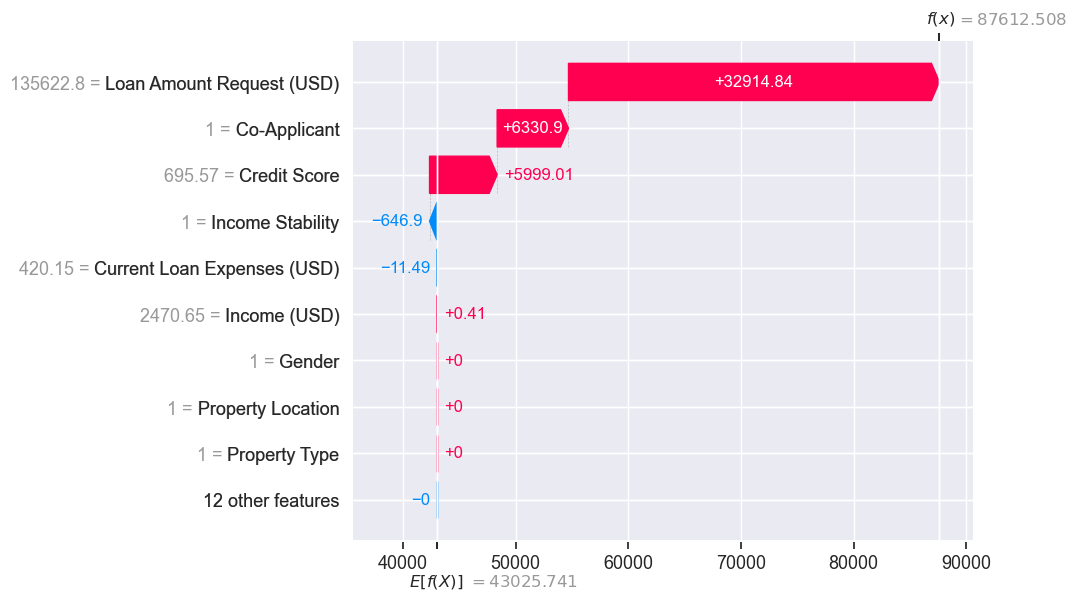

In [159]:
explainer = shap.Explainer(d_tree, X_test)
shap_values = explainer(X_test, check_additivity = False)
shap.plots.waterfall(shap_values[0])

In [160]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [163]:
r_forest = RandomForestRegressor()
param_grid = {
    'max_depth':[3,5,7,9],
    'min_samples_leaf':[1,2,4],
    'min_samples_split':[2,5,10],
    'max_features':['auto','sqrt'],
    'random_state':[0,42,101]
}

grid_cv = GridSearchCV(estimator=r_forest, param_grid=param_grid,cv = 5, scoring = 'r2')

grid_cv.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
print('Best hyperparameters for Random Forest Regressor are: {}'.format(grid_cv.best_params_))

In [164]:
r_forest = RandomForestRegressor(random_state=42,max_depth = 9, min_samples_leaf=4, min_samples_split=10,
                                max_features='auto')

r_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=9, max_features='auto', min_samples_leaf=4,
                      min_samples_split=10, random_state=42)

In [165]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math

y_pred = r_forest.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is: {}'.format(mae))
print('MAPE is: {}'.format(mape))
print('MSE is: {}'.format(mse))
print('R2 score is: {}'.format(r2))
print('RMSE is: {}'.format(rmse))

MAE is: 12463.571514640085
MAPE is: 2.1648478706885906e+19
MSE is: 610772353.2356801
R2 score is: 0.7341818154261468
RMSE is: 24713.808958468544


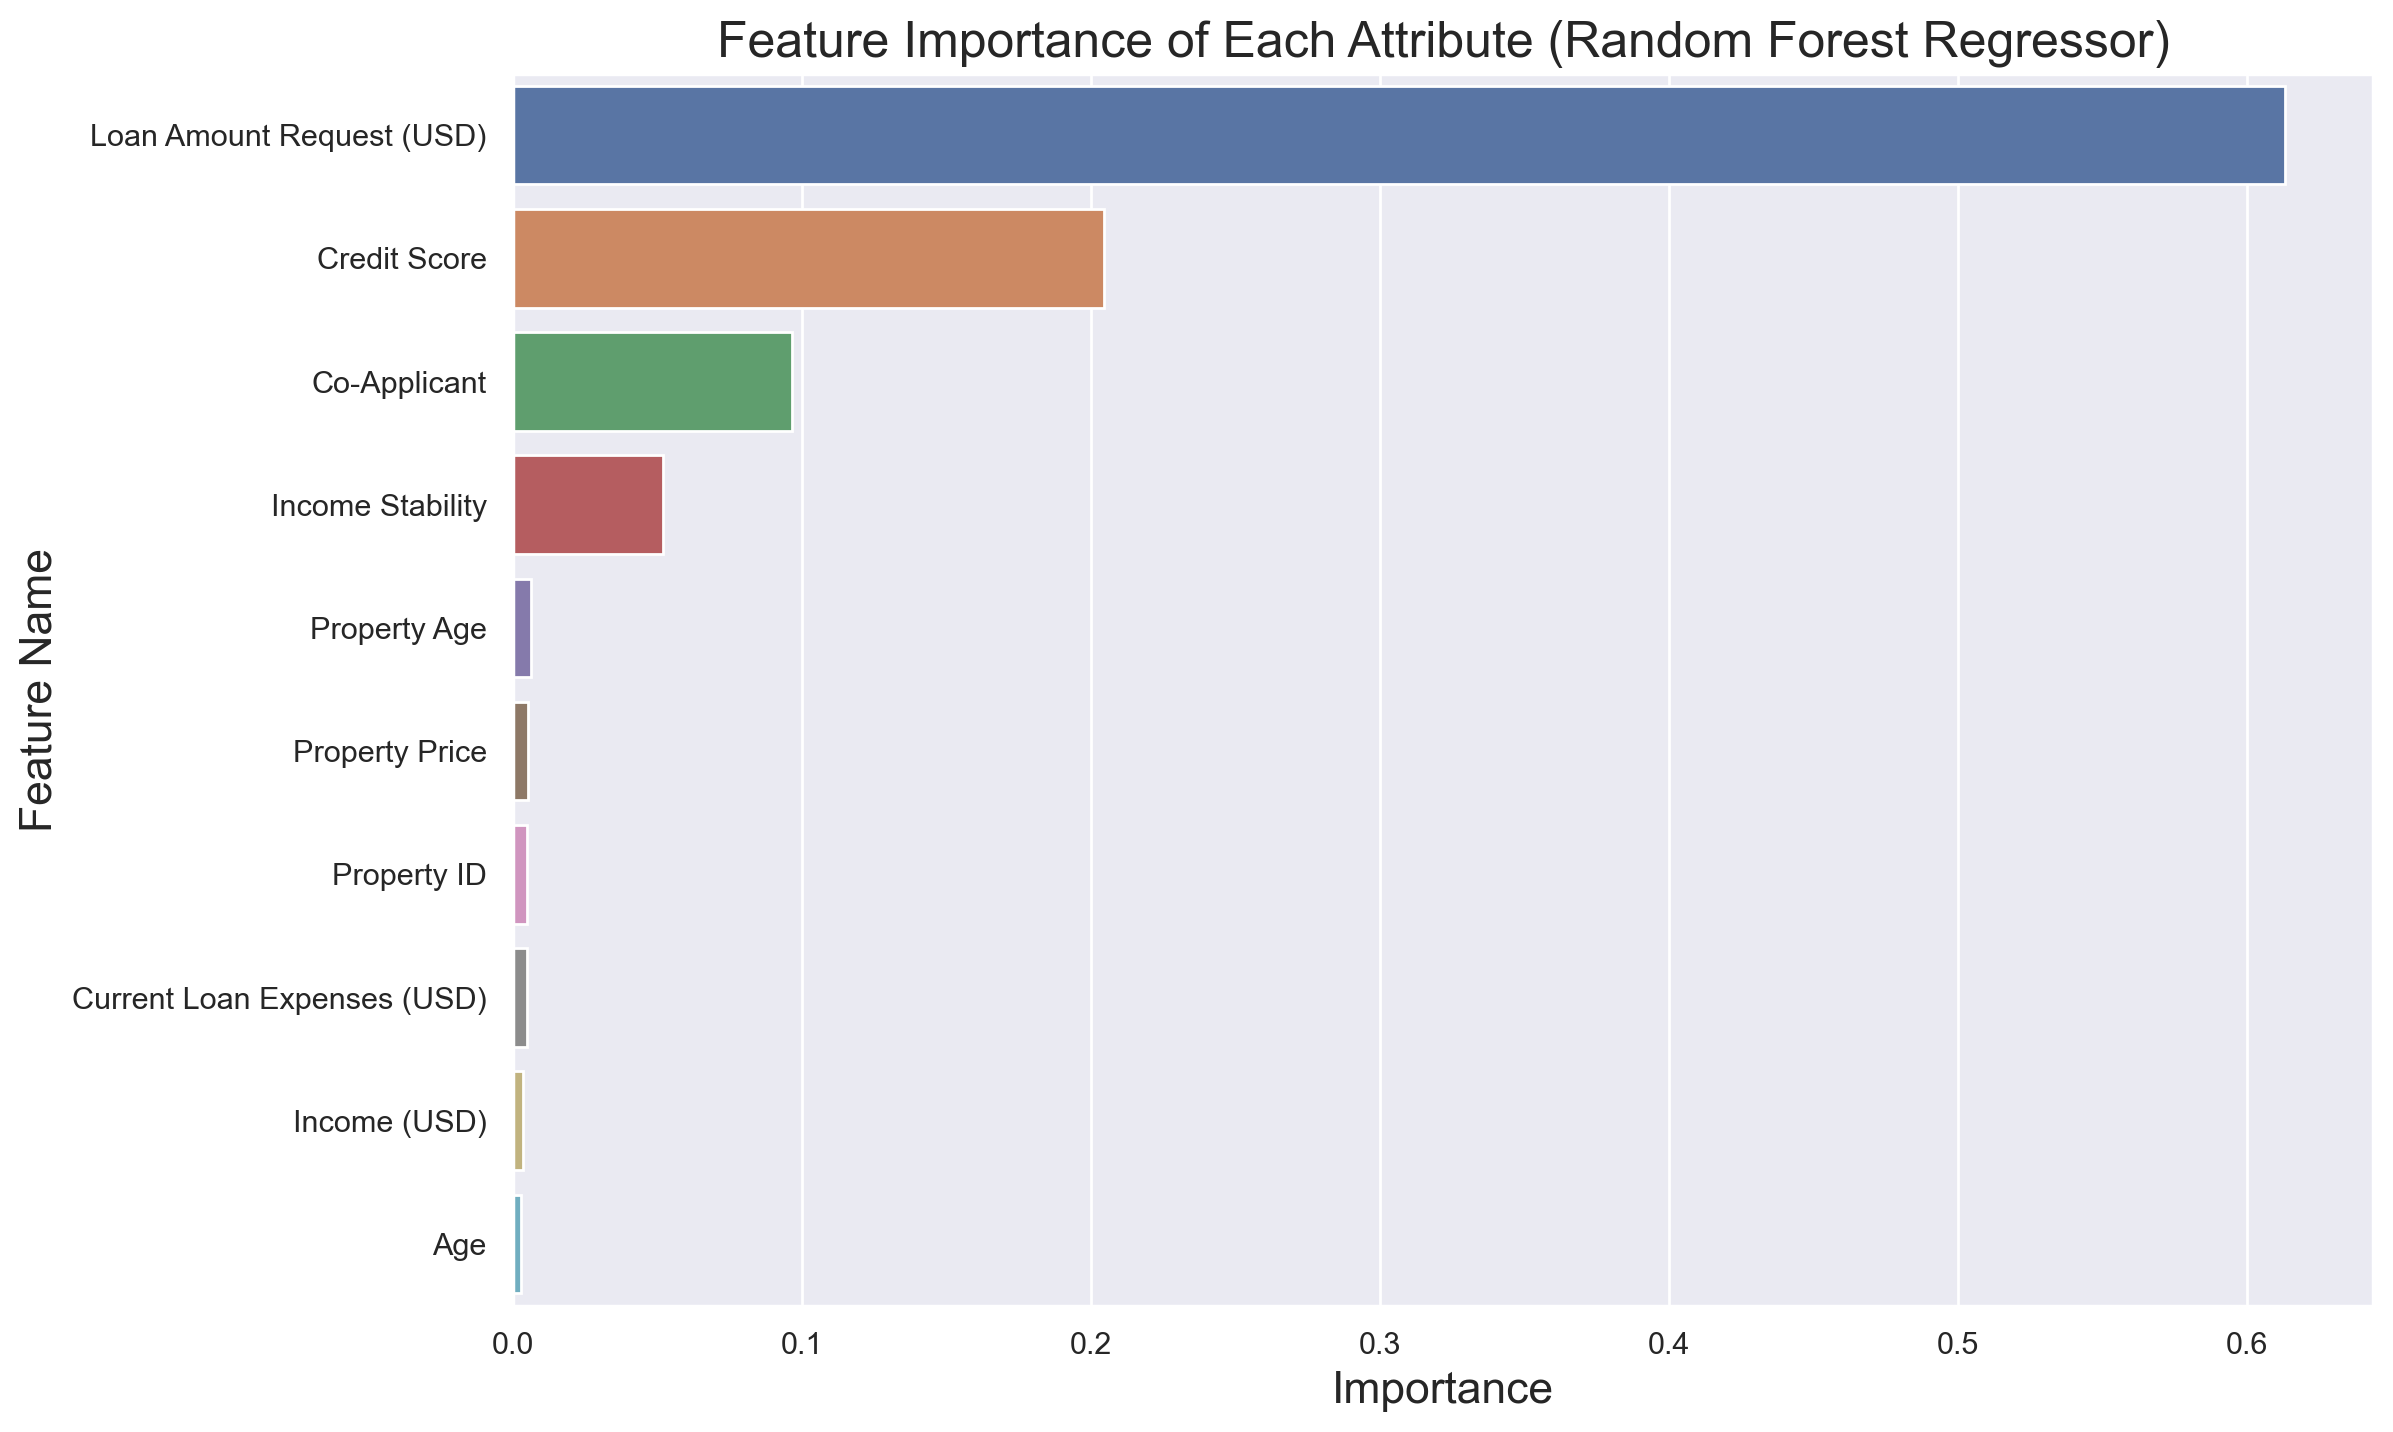

In [167]:
imp_df = pd.DataFrame({'Feature Name':X_train.columns,
                     'Importance':r_forest.feature_importances_})
fi = imp_df.sort_values(by = 'Importance',ascending=False)

fi2 = fi.head(10)
plt.figure(figsize = (12,8), dpi = 200)

sns.barplot(data=fi2, x = 'Importance', y = 'Feature Name')

plt.title('Feature Importance of Each Attribute (Random Forest Regressor)', fontsize = 18)

plt.xlabel('Importance', fontsize = 16)
plt.ylabel('Feature Name', fontsize = 16)
plt.show()

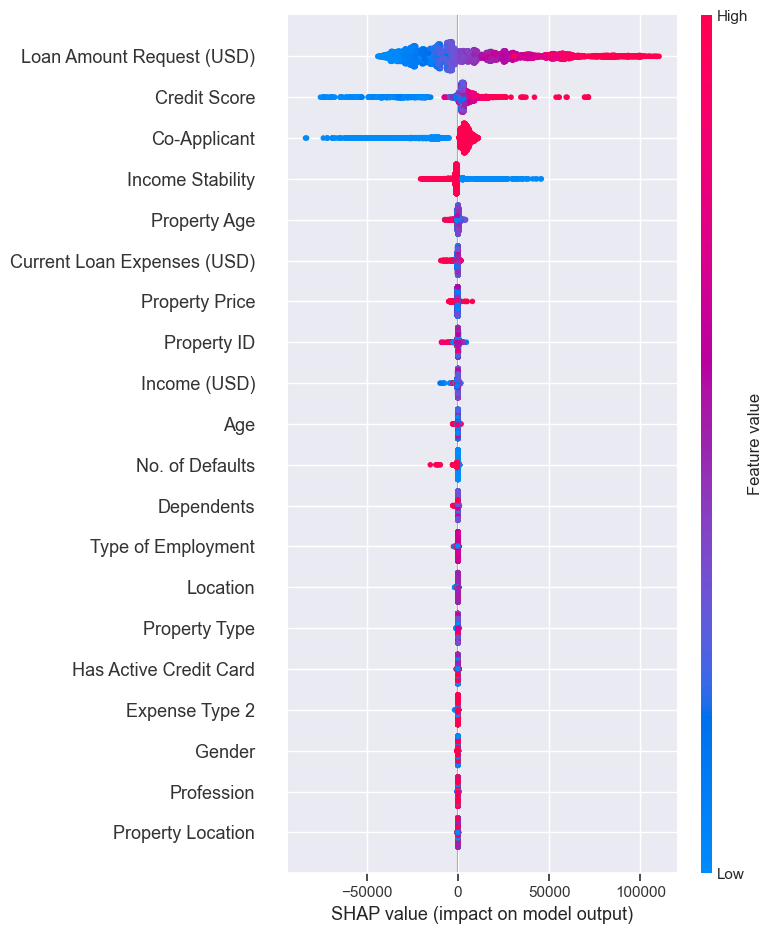

In [169]:
import shap

explainer = shap.TreeExplainer(r_forest)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values,X_test)

 99%|===================| 5263/5295 [00:44<00:00]        

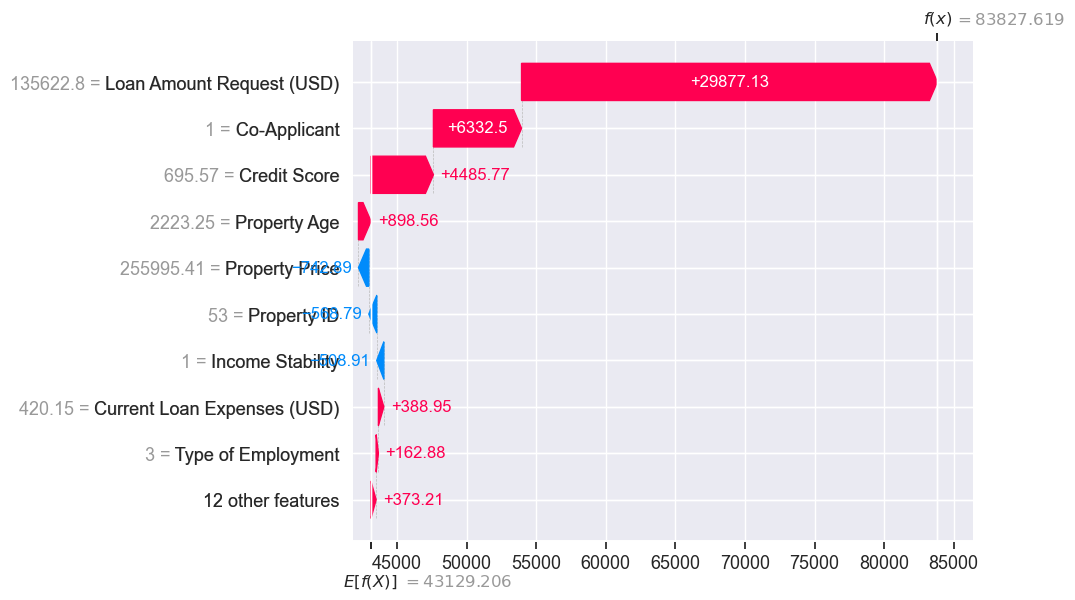

In [171]:
explainer = shap.Explainer(r_forest, X_test, check_additivity = False)
shap_values = explainer(X_test, check_additivity = False)
shap.plots.waterfall(shap_values[0])